In [1]:
%matplotlib inline

import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [2]:
steam_df = pd.read_csv("https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1")
steam_df.head()

,drum pressure,excess oxygen,water level,steam flow
0,320.08239,2.506774,0.032701,9.302970
1,321.71099,2.545908,0.284799,9.662621
2,320.91331,2.360562,0.203652,10.990955
3,325.00252,0.027054,0.326187,12.430107
4,326.65276,0.285649,0.753776,13.681666


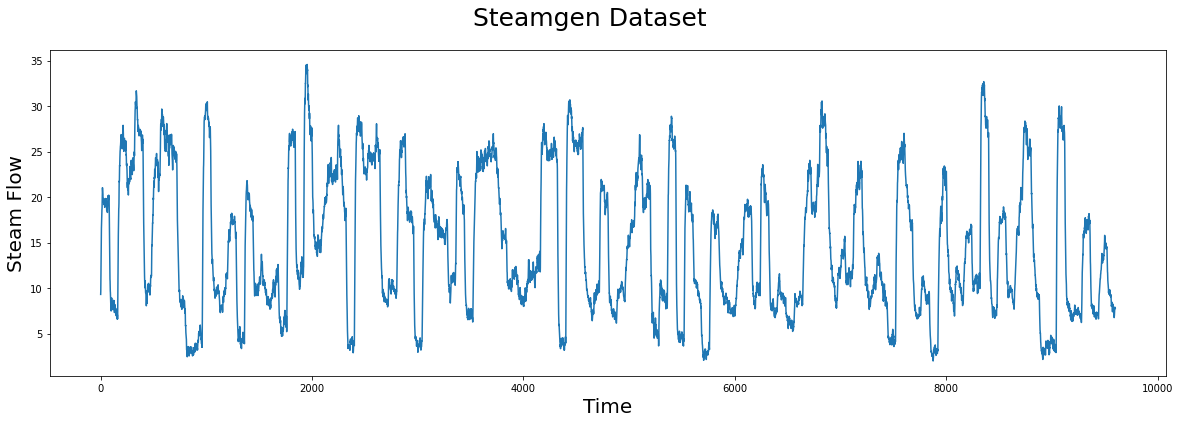

In [3]:
plt.suptitle('Steamgen Dataset', fontsize='25')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Steam Flow', fontsize='20')
plt.plot(steam_df['steam flow'].values)
plt.show()

In [4]:
m = 640
mp = stumpy.stump(steam_df['steam flow'], m)
true_P = mp[:, 0]

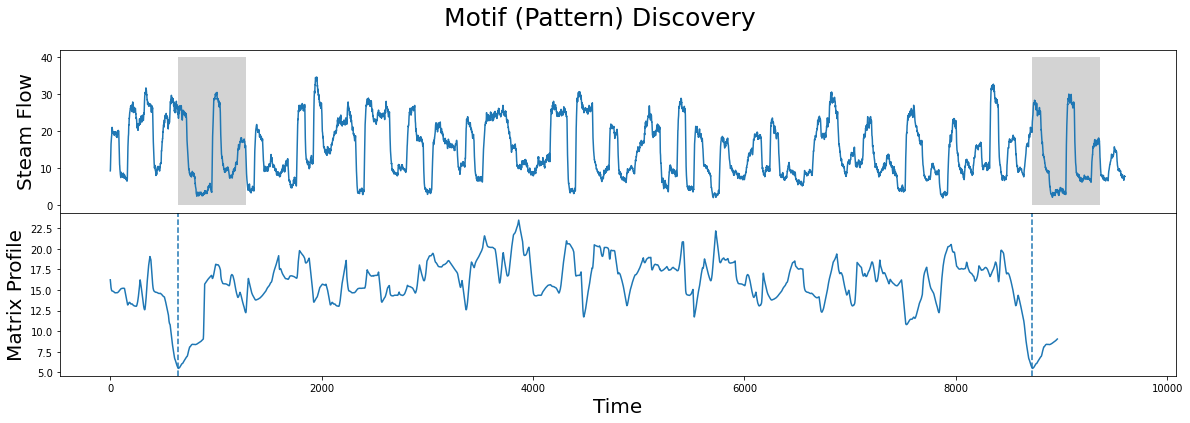

In [5]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='25')

axs[0].plot(steam_df['steam flow'].values)
axs[0].set_ylabel('Steam Flow', fontsize='20')
rect = Rectangle((643, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((8724, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=643, linestyle="dashed")
axs[1].axvline(x=8724, linestyle="dashed")
axs[1].plot(true_P)
plt.show()

In [7]:
def compare_approximation(true_P, approx_P):
    fig, ax = plt.subplots(gridspec_kw={'hspace': 0})

    ax.set_xlabel('Time', fontsize ='20')
    ax.axvline(x=643, linestyle="dashed")
    ax.axvline(x=8724, linestyle="dashed")
    ax.set_ylim((5, 28))
    ax.plot(approx_P, color='C1', label="Approximate Matrix Profile")
    ax.plot(true_P, label="True Matrix Profile")
    ax.legend()
    plt.show()

In [8]:
approx = stumpy.scrump(steam_df['steam flow'], m, percentage=0.01, pre_scrump=False)

In [9]:
approx.update()

In [10]:
approx_P = approx.P_

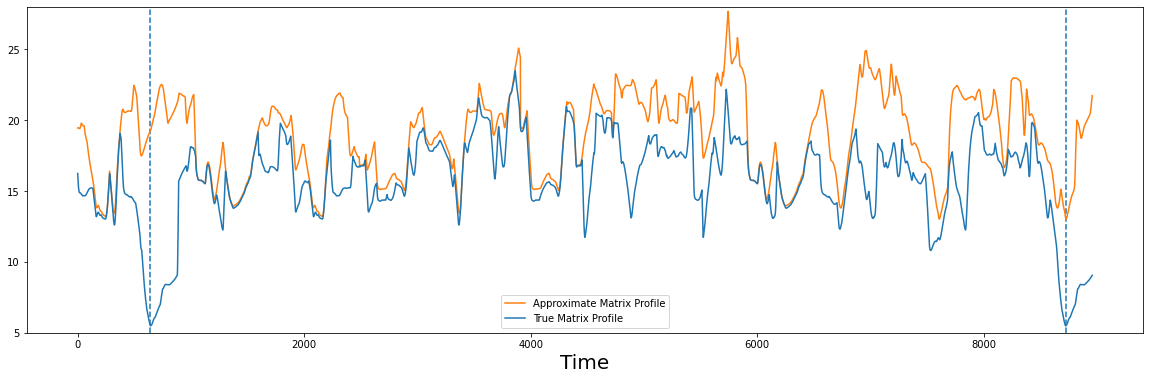

In [11]:
compare_approximation(true_P, approx_P)

In [12]:
for _ in range(9):
    approx.update()

approx_P = approx.P_

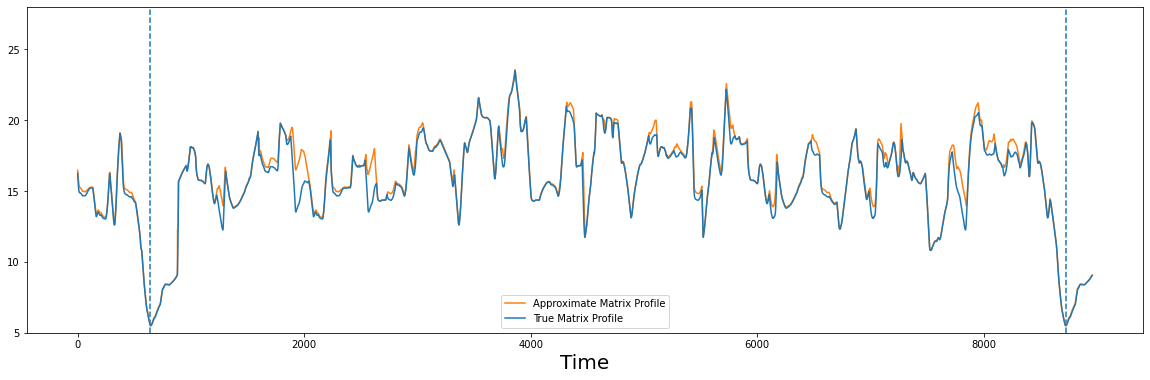

In [13]:
compare_approximation(true_P, approx_P)

In [14]:
approx = stumpy.scrump(steam_df['steam flow'], m, percentage=0.01, pre_scrump=True, s=None)
approx.update()
approx_P = approx.P_

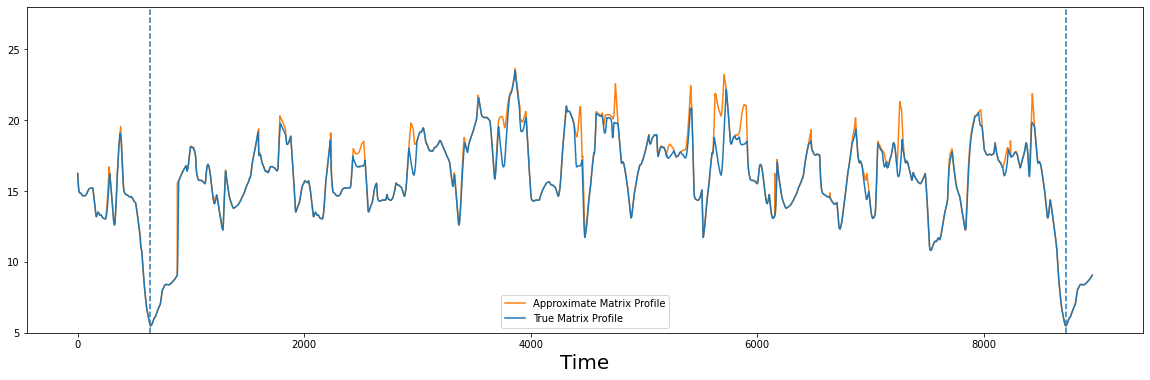

In [15]:
compare_approximation(true_P, approx_P)